In [7]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

You should consider upgrading via the 'c:\users\hksci\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import gym
import gym_anytrading
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

In [9]:
df = pd.read_csv('data/AAPL5.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume
0,02-08-2016,26.512501,26.517500,26.000000,26.120001,135266400
1,03-08-2016,26.202499,26.459999,26.192499,26.447500,120810400
2,04-08-2016,26.395000,26.500000,26.320000,26.467501,109634800
3,05-08-2016,26.567499,26.912500,26.545000,26.870001,162213600
4,08-08-2016,26.879999,27.092501,26.790001,27.092501,112148800


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [12]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
22,2016-01-09,26.535000,26.700001,26.405001,26.682501,106806000
64,2016-01-11,28.365000,28.442499,27.632500,27.872499,175303200
85,2016-01-12,27.592501,27.735001,27.257500,27.372499,148347600
0,2016-02-08,26.512501,26.517500,26.000000,26.120001,135266400
23,2016-02-09,26.924999,27.000000,26.705000,26.932501,107210000


In [13]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-09,26.535000,26.700001,26.405001,26.682501,106806000
2016-01-11,28.365000,28.442499,27.632500,27.872499,175303200
2016-01-12,27.592501,27.735001,27.257500,27.372499,148347600
2016-02-08,26.512501,26.517500,26.000000,26.120001,135266400
2016-02-09,26.924999,27.000000,26.705000,26.932501,107210000


In [14]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [15]:
env.signal_features

array([[ 2.6682501e+01,  0.0000000e+00],
       [ 2.7872499e+01,  1.1899980e+00],
       [ 2.7372499e+01, -5.0000000e-01],
       [ 2.6120001e+01, -1.2524980e+00],
       [ 2.6932501e+01,  8.1250000e-01],
       [ 2.7897499e+01,  9.6499800e-01],
       [ 2.7475000e+01, -4.2249900e-01],
       [ 2.6447500e+01, -1.0275000e+00],
       [ 2.8129999e+01,  1.6824990e+00],
       [ 2.7457500e+01, -6.7249900e-01],
       [ 2.6467501e+01, -9.8999900e-01],
       [ 2.8250000e+01,  1.7824990e+00],
       [ 2.7209999e+01, -1.0400010e+00],
       [ 2.6870001e+01, -3.3999800e-01],
       [ 2.8262501e+01,  1.3925000e+00],
       [ 2.7277500e+01, -9.8500100e-01],
       [ 2.6924999e+01, -3.5250100e-01],
       [ 2.8472500e+01,  1.5475010e+00],
       [ 2.7487499e+01, -9.8500100e-01],
       [ 2.7090000e+01, -3.9749900e-01],
       [ 2.8514999e+01,  1.4249990e+00],
       [ 2.7602501e+01, -9.1249800e-01],
       [ 2.7757500e+01,  1.5499900e-01],
       [ 2.7092501e+01, -6.6499900e-01],
       [ 2.63799

# 2. Build Environment

In [16]:
env.action_space

Discrete(2)

info {'total_reward': 3.202503999999987, 'total_profit': 0.7908246759805354, 'position': 0}


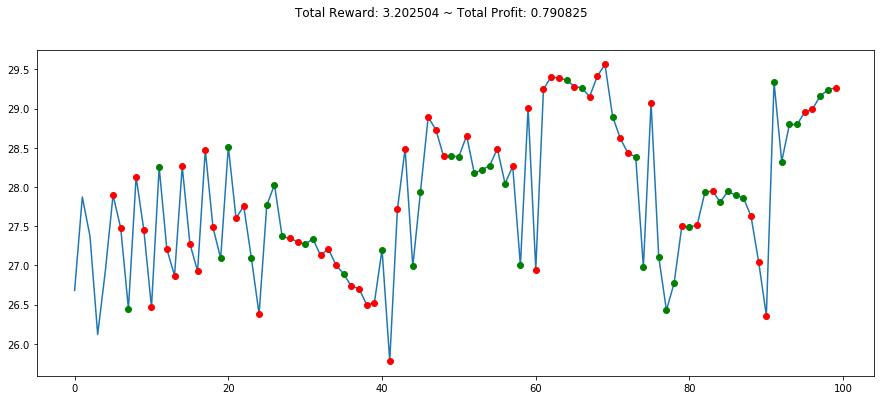

In [17]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [18]:
!pip install finta

You should consider upgrading via the 'c:\users\hksci\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## 2.1.2. Fix Volume Column

In [20]:
df['Volume'] = df['Volume'].astype(str)
# df["text"] = [x.replace(':',' ') for x in df["text"]]
df['Volume'] = df['Volume'].apply(lambda x: str(x.replace(",", "")))
df['Volume'] = df['Volume'].astype(float)

In [21]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## Custom Indicator

In [140]:
df['EMA'] = TA.EMA(df,7)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
# df['ADX'] = TA.WILLIAMS(df)
df.fillna(0, inplace=True)

In [141]:
df.head(20)

,Open,High,Low,Close,Volume,EMA,RSI,ADX,OBV
Date,,,,,,,,,
2016-01-09,26.535000,26.700001,26.405001,26.682501,106806000.0,26.682501,0.000000,0.0,0.0
2016-01-11,28.365000,28.442499,27.632500,27.872499,175303200.0,27.362500,100.000000,175303200.0,175303200.0
2016-01-12,27.592501,27.735001,27.257500,27.372499,148347600.0,27.366824,68.847316,26955600.0,26955600.0
2016-02-08,26.512501,26.517500,26.000000,26.120001,135266400.0,26.910843,37.408842,-108310800.0,-108310800.0
2016-02-09,26.924999,27.000000,26.705000,26.932501,107210000.0,26.917942,52.546897,-1100800.0,-1100800.0
2016-02-11,27.850000,28.087500,27.807501,27.897499,113326800.0,27.215853,63.758170,112226000.0,112226000.0
2016-02-12,27.292500,27.522499,27.212500,27.475000,106112000.0,27.290620,57.367582,6114000.0,6114000.0
2016-03-08,26.202499,26.459999,26.192499,26.447500,120810400.0,27.056391,45.439310,-114696400.0,-114696400.0
2016-03-10,28.177500,28.262501,28.070000,28.129999,86807200.0,27.346582,60.077475,-27889200.0,-27889200.0


## New Environments

In [25]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','Volume','EMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [126]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=5, frame_bound=(5,800))

In [127]:
env2.signal_features

array([[2.64050010e+01, 1.06806000e+08, 2.66825010e+01, 0.00000000e+00,
        0.00000000e+00],
       [2.76325000e+01, 1.75303200e+08, 2.73624999e+01, 1.00000000e+02,
        1.75303200e+08],
       [2.72575000e+01, 1.48347600e+08, 2.73668238e+01, 6.88473160e+01,
        2.69556000e+07],
       ...,
       [4.81925010e+01, 1.64834800e+08, 5.04124321e+01, 4.66828277e+01,
        1.58401880e+09],
       [4.79049990e+01, 1.04883600e+08, 4.98455740e+01, 4.55541073e+01,
        1.47913520e+09],
       [5.03899990e+01, 7.15884000e+07, 5.00860553e+01, 4.86497366e+01,
        1.55072360e+09]])

In [128]:
df.head()

,Open,High,Low,Close,Volume,EMA,RSI,ADX
Date,,,,,,,,
2016-01-09,26.535000,26.700001,26.405001,26.682501,106806000.0,26.682501,0.000000,0.0
2016-01-11,28.365000,28.442499,27.632500,27.872499,175303200.0,27.362500,100.000000,175303200.0
2016-01-12,27.592501,27.735001,27.257500,27.372499,148347600.0,27.366824,68.847316,26955600.0
2016-02-08,26.512501,26.517500,26.000000,26.120001,135266400.0,26.910843,37.408842,-108310800.0
2016-02-09,26.924999,27.000000,26.705000,26.932501,107210000.0,26.917942,52.546897,-1100800.0


# 3. Environment and Training

In [129]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [130]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | 0.0773   |
| fps                | 27       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 5.08     |
---------------------------------
---------------------------------
| explained_variance | -0.00579 |
| fps                | 586      |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 59       |
---------------------------------
---------------------------------
| explained_variance | 0.00211  |
| fps                | 675      |
| nupdates           | 200      |
| policy_entropy     | 0.691    |
| total_timesteps    | 1000     |
| value_loss         | 2.69     |
---------------------------------
---------------------------------
| explained_variance | 0.0434   |
| fps                | 711      |
| nupdates           | 300      |
| policy_entropy     | 0.691    |
| total_timest

# Evaluation

In [136]:
env = MyCustomEnv(df=df, window_size=5, frame_bound=(800,980))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        
        print("info", info)
        break

info {'total_reward': 24.994996000000015, 'total_profit': 1.4738547643852837, 'position': 1}


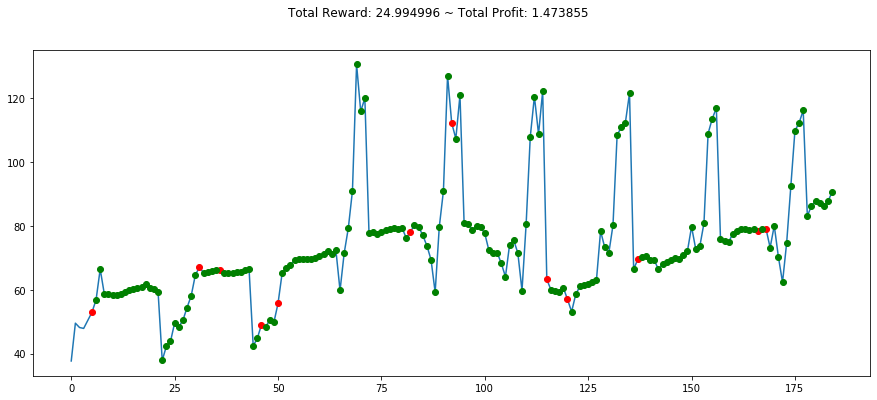

In [137]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()